In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from pypvcell.solarcell import SQCell,MJCell,DBCell
from pypvcell.illumination import Illumination
from pypvcell.photocurrent import gen_step_qe

/Users/kanhua/Dropbox/Programming/python_distribution_try/pypvcell_p3_lw/lib/python3.5/site-packages/matplotlib/cbook.py:128: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the matplotlib toolkit finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
input_ill=Illumination("AM1.5g")

Text(0,0.5,'efficiency')

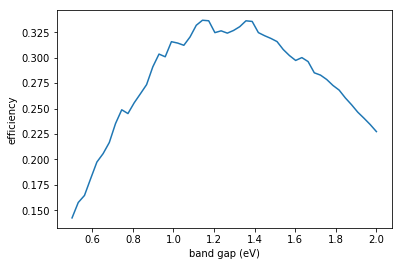

In [3]:
eg_array = np.linspace(0.5, 2.0)
eta_array_air_semi_class=[]
for eg in eg_array:
    sq_cell = SQCell(eg=eg, cell_T=293, n_c=1, n_s=1)
    sq_cell.set_input_spectrum(input_spectrum=input_ill)

    eta_array_air_semi_class.append(sq_cell.get_eta())

plt.plot(eg_array, eta_array_air_semi_class, label="nc=1,ns=1 (class)")
plt.xlabel("band gap (eV)")
plt.ylabel("efficiency")

## Calculate triple-junction cell with Germanium substrate

In [26]:
conc_ill=Illumination("AM1.5d",concentration=1)
top_eg=np.linspace(1.6,2.2,num=20) # Set up range of top cell band gaps
mid_eg=np.linspace(0.9,1.55,num=20)# Set up range of top cell band gaps

eta=np.zeros((20,20)) # Initialize an array for storing efficiencies

ge_cell=SQCell(eg=0.67,cell_T=293)
for i,teg in enumerate(top_eg):
    for j,beg in enumerate(mid_eg):
        tc=SQCell(eg=teg,cell_T=293) # Set up top cell
        bc=SQCell(eg=beg,cell_T=293) # Set up bottom cell
        mj=MJCell([tc, bc,ge_cell]) # Make multijunction cell by "streaming" the 1J cells
        mj.set_input_spectrum(conc_ill) # Set up the illumination
        eta[i,j]=mj.get_eta() # Store the calculated efficiency in an array

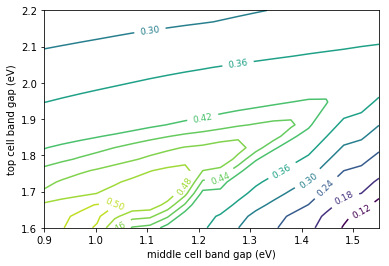

In [27]:
levels=np.unique(np.concatenate((np.arange(0.12,0.6,step=0.06),[0.44,0.46,0.48,0.50])))
cs=plt.contour(mid_eg,top_eg,eta,levels)
plt.clabel(cs,levels, fontsize=9, inline=1,fmt="%.2f")
plt.xlabel("middle cell band gap (eV)")
plt.ylabel("top cell band gap (eV)")
plt.savefig("3J_2d_240suns.pdf")

In [6]:
np.max(eta)

0.52337342019524313

## Compare Table II. of the EtaOpt paper
Condition: AM1.5d, Eg=1.13eV, T=300K

In [16]:
# The AM1.5d spectrum has to be normalized to 1000 W/m^2
input_ill=Illumination("AM1.5d",concentration=1000/918)
sq_cell = SQCell(eg=1.13, cell_T=293, n_c=1, n_s=1)
sq_cell.set_input_spectrum(input_spectrum=input_ill)
sq_cell.get_eta()

0.32125167127436061

Condition: 1.84/1.16/0.69

In [37]:
ill=Illumination("AM1.5d",concentration=46200*1000/918)
mj=MJCell([SQCell(eg=1.84,cell_T=293,n_c=1,n_s=1),
          SQCell(eg=1.16,cell_T=293,n_c=1,n_s=1),
          SQCell(eg=0.69,cell_T=293,n_c=1,n_s=1)])
mj.set_input_spectrum(input_spectrum=ill)
mj.get_eta()

-7701262.4761
-8000531.58796
0.0


0.61774462113323403

The result does not seemt to match very well (against 67%). Something goes wrong with the numerical calculation at large concentration.

-7701262.4761
-8000531.58796
0.0


(-8000531.5879639592, 0)

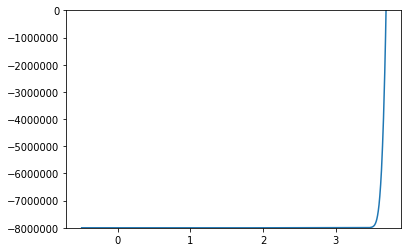

In [38]:
iv=mj.get_iv()
plt.plot(*iv)
plt.ylim([np.min(iv[1]),0])

## Check X/1.1eV
Find the optimal band gap on silicon subcell

In [22]:
input_ill=Illumination("AM1.5g",concentration=1)
top_eg=np.linspace(1.6,2,num=100) # Set up range of top cell band gaps

eta=np.zeros(100) # Initialize an array for storing efficiencies

si_cell=SQCell(eg=1.12,cell_T=293,n_c=3.5,n_s=1)
for i,teg in enumerate(top_eg):
    #qe=gen_step_qe(teg,1)
    #tc=DBCell(qe,rad_eta=1,T=293,n_c=3.5,n_s=1) # Set up top cell
    tc=SQCell(teg,cell_T=293)
    mj=MJCell([tc, si_cell]) # Make multijunction cell by "streaming" the 1J cells
    mj.set_input_spectrum(input_ill) # Set up the illumination
    eta[i]=mj.get_eta() # Store the calculated efficiency in an array

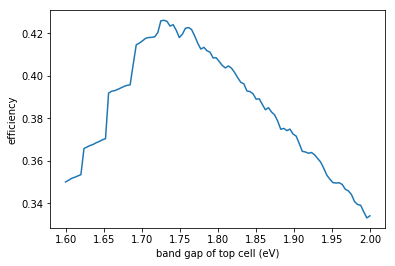

In [23]:
plt.plot(top_eg,eta)
plt.xlabel("band gap of top cell (eV)")
plt.ylabel("efficiency")
plt.savefig("sj_on_si.pdf")

Optimal top cell band gap

In [24]:
top_eg[np.argmax(eta)]

1.7292929292929293

maximum efficiency

In [25]:
np.max(eta)

0.4262112203246502